## Test 5 ##

In [1]:
from PIL import Image
import matplotlib.pyplot as plt 
import cv2
import numpy as np

from openslide import OpenSlide

In [2]:
from matplotlib.collections import LineCollection

In [3]:
path_1 = "/workspace/2024_05_27__1138-シングルファイルエクスポート-04.tif"
wsi = OpenSlide(path_1)
patch_size=200*2

In [5]:
wsi_test1 = wsi.read_region(location=(35100, 43100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test2 = wsi.read_region(location=(36100, 53100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test3 = wsi.read_region(location=(37000, 58900), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test4 = wsi.read_region(location=(25100, 33100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test5 = wsi.read_region(location=(25200, 43100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test6 = wsi.read_region(location=(26200, 30000), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test7 = wsi.read_region(location=(26200, 30000), level=0, size=(patch_size*2,patch_size*2)).convert("RGB")

In [38]:
def pickup_wbc_thresh(wsi_test, size=60, blue_thresh=150, red_thresh=150):
    image_array = np.array(wsi_test) #np.arrayに変換
    print(image_array.shape)
    pil_img = Image.fromarray(image_array) #PIL Image

    gray = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY) #gray scale

    ret, binary = cv2.threshold(gray, 10, 255, cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV) #OTSU
    print("OHTSU Thresh :", ret)

    img_pro = np.array([((np.array(image_array[i]).T)*(np.array(binary[i])*np.array([1/255]))).T for i in range(len(image_array))]) #OTSU+color Image
    pil_img = Image.fromarray(img_pro.astype(np.uint8))

    x = 0
    y = 0
    X = [0, 0]
    Y = [0, 0]
    blue_mean_max = 0

    loc_lst = []
    ap = loc_lst.append

    for i in range(0, image_array.shape[0], 10):
        for j in range(0, image_array.shape[1], 10):
            pil_img_batch = pil_img.crop((i, j, i+size, j+size))
            numpy_image = np.array(pil_img_batch)
            blue_mean = numpy_image[:, :, 2].mean()
            red_mean = numpy_image[:, :, 0].mean()
            if blue_mean > blue_thresh and red_mean < red_thresh:
                ap([i, j])
            else:
                pass
    area_lst = []
    ap_area = area_lst.append
    del_area = area_lst.remove

    for loc in loc_lst:
        for area in area_lst:
            if (area[0][0]-2*size <= loc[0] <= area[0][1]+2*size) and (area[1][0]-2*size <= loc[1] <= area[1][1]+2*size):
                xmin = min(loc[0], area[0][0])
                xmax = max(loc[0]+size, area[0][1])
                ymin = min(loc[1], area[1][0])
                ymax = max(loc[1]+size, area[1][1])
                del_area(area)
                ap_area([[xmin, xmax], [ymin, ymax]])
                break
        else:
            ap_area([[loc[0], loc[0]+size], [loc[1], loc[1]+size]])
    pickup_wbc_lst = [[[i[0][0]-size/2, i[1][0]-size/2], 
    [i[0][0]-size/2, i[1][1]+size/2], 
    [i[0][1]+size/2, i[1][1]+size/2], 
    [i[0][1]+size/2, i[1][0]-size/2], 
    [i[0][0]-size/2, i[1][0]-size/2]] for i in area_lst if i[0][1]-i[0][0] > 30 and i[1][1]-i[1][0] > 30]
    wbc_area = np.array(pickup_wbc_lst)
    lc = LineCollection(wbc_area, color='lime', linestyle='dotted')
    fig, ax = plt.subplots()
    ax.imshow(image_array)
    ax.add_collection(lc)
    plt.title("WBC detection")
    plt.show()

(400, 400, 3)
OHTSU Thresh : 192.0


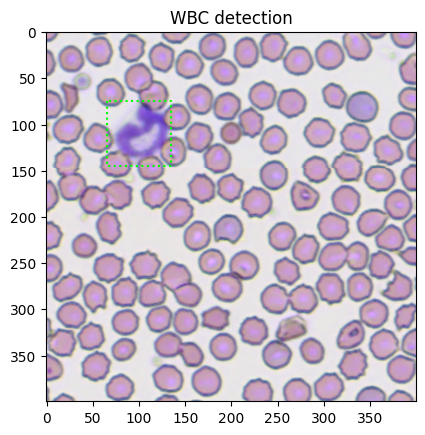

(400, 400, 3)
OHTSU Thresh : 193.0


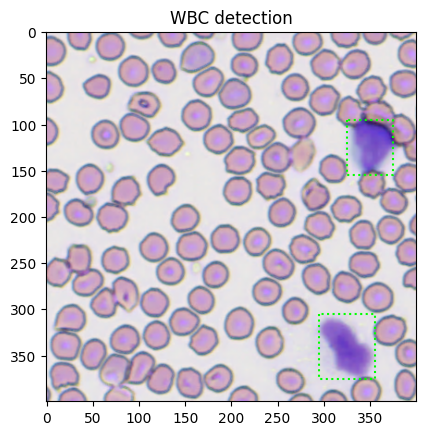

(400, 400, 3)
OHTSU Thresh : 195.0


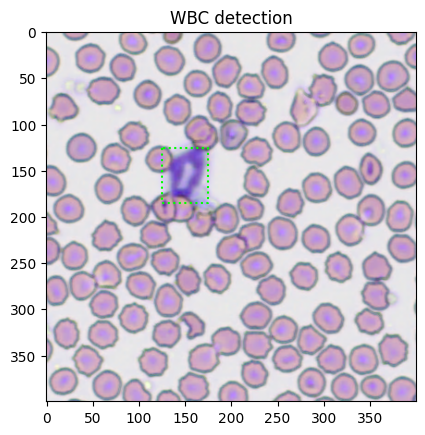

(400, 400, 3)
OHTSU Thresh : 189.0


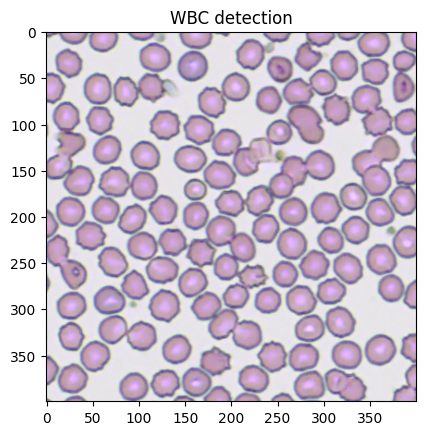

(400, 400, 3)
OHTSU Thresh : 181.0


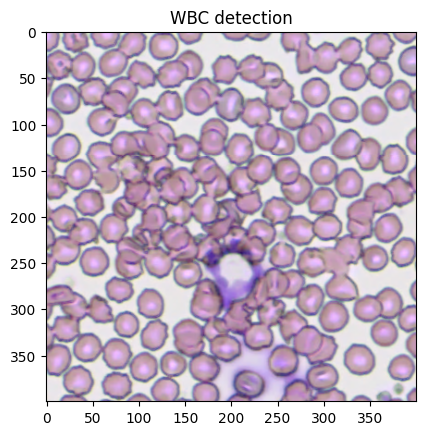

(400, 400, 3)
OHTSU Thresh : 187.0


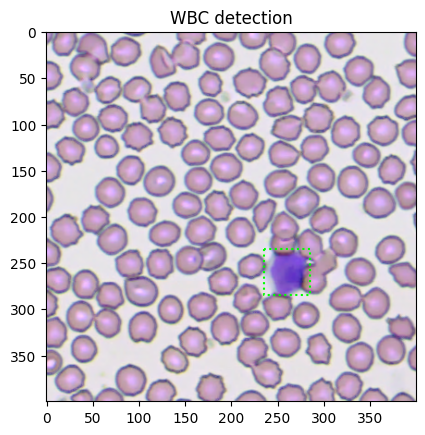

(800, 800, 3)
OHTSU Thresh : 187.0


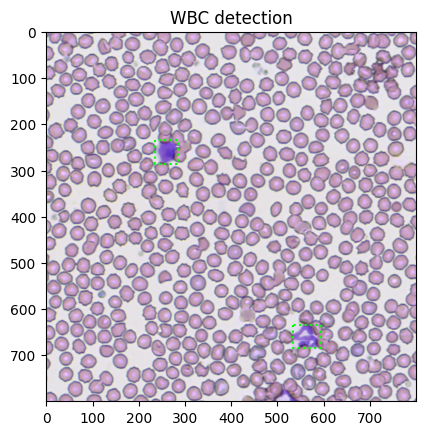

In [39]:
for wsi_test in [wsi_test1, wsi_test2, wsi_test3, wsi_test4, wsi_test5, wsi_test6, wsi_test7]:
    pickup_wbc_thresh(wsi_test, size=10, blue_thresh=175)